# COGS 189 Final Project

This project aims to </br>
Group Members: 
Stephen Gelinas (A15816513)
Aditya Tomar (A17162996)
Shay Samat
Rolando Restua
Kevin Wong 

## Data Loading

We will first load and inspect the raw EEG data we collected with OpenBCI

In [1]:
# required imoprts
import pandas as pd
from IPython.display import Image

In [2]:
# read EEG data
df = pd.read_csv('data/eeg.txt')
df.head()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386,...,12.0,48.0,229.0,48.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.792
1,1.0,20007.337035,7455.603177,2753.377289,2629.906253,1095.973086,1520.455065,9324.119607,7072.449574,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.809
2,2.0,20010.935665,7457.324261,2753.645510,2630.867378,1089.558135,1516.051771,9328.612307,7063.553579,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.812
3,3.0,20021.329227,7457.458372,2753.176123,2630.599157,1083.947847,1517.772855,9331.875662,7054.121143,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.815
4,4.0,20028.168860,7457.123096,2753.042013,2630.152122,1082.249115,1522.489074,9335.429589,7034.541015,0.386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678216e+09,0.0,2023-03-07 10:58:21.818


There appears to be no missing values from the data collection process in the raw EEG data

In [3]:
# determine if any values are missing
df.isna().sum()

Sample Index              0
 EXG Channel 0            0
 EXG Channel 1            0
 EXG Channel 2            0
 EXG Channel 3            0
 EXG Channel 4            0
 EXG Channel 5            0
 EXG Channel 6            0
 EXG Channel 7            0
 Accel Channel 0          0
 Accel Channel 1          0
 Accel Channel 2          0
 Other                    0
 Other.1                  0
 Other.2                  0
 Other.3                  0
 Other.4                  0
 Other.5                  0
 Other.6                  0
 Analog Channel 0         0
 Analog Channel 1         0
 Analog Channel 2         0
 Timestamp                0
 Other.7                  0
 Timestamp (Formatted)    0
dtype: int64

The image below illustrates locations of the 8 selected channels for the data collection process (including GND and REF) 

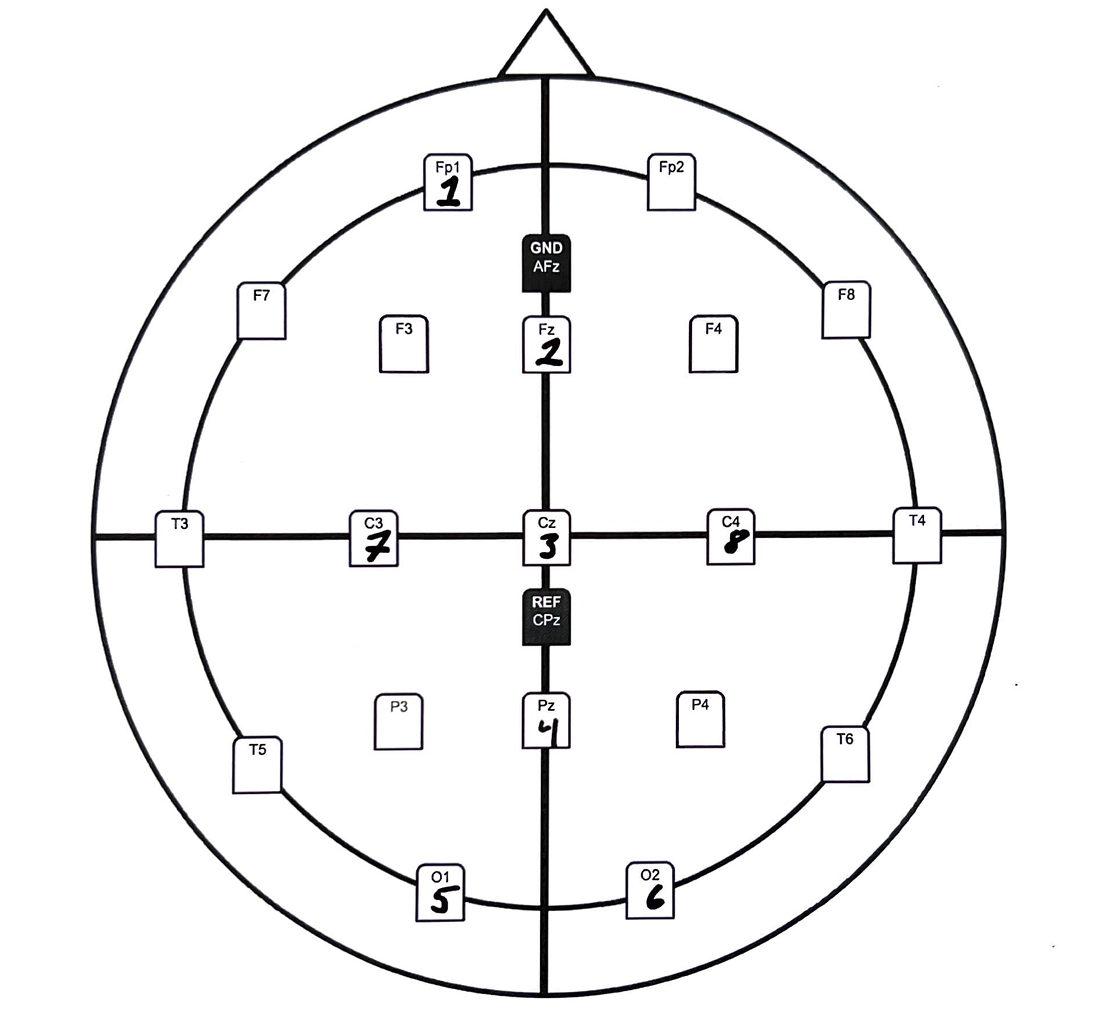

In [7]:
Image("data/channels.png", width=400)

## Data Cleaning/Preprocessing

In [8]:
# "Other" channels that didn't collect EEG data
df[[' Other', ' Other.7']].value_counts().to_frame(name='Total Count')

,,Total Count
Other,Other.7,
192.0,0.0,248554


In [9]:
# "Analog" channels that didn't collect EEG data
analog = [' Analog Channel 0', ' Analog Channel 1', ' Analog Channel 2']
df[analog].value_counts().to_frame(name='Total Count')

,,,Total Count
Analog Channel 0,Analog Channel 1,Analog Channel 2,
0.0,0.0,0.0,248554


In [10]:
# drop data from these channels
dropped = [' Other', ' Other.7', ' Analog Channel 0', ' Analog Channel 1', ' Analog Channel 2']
df_cleaned = df.drop(columns=dropped)

In [ ]:
# visualizations:
